# Pandas


* Series
* DataFrame
* Reindexing
* Dropping Entries
* Indexing, Selecting, Filtering
* Arithmetic and Data Alignment
* Function Application and Mapping
* Sorting and Ranking
* Axis Indices with Duplicate Values
* Summarizing and Computing Descriptive Statistics
* Cleaning Data (Under Construction)
* Input and Output (Under Construction)

In [ ]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

## Series

A Series is a one-dimensional array-like object containing an array of data and an associated array of data labels.  The data can be any NumPy data type and the labels are the Series' index.

Create a Series:

In [ ]:
ser_1 = Series([1, 1, 2, -3, -5, 8, 13])
ser_1

0     1
1     1
2     2
3    -3
4    -5
5     8
6    13
dtype: int64

Get the array representation of a Series:

In [ ]:
ser_1.values

array([ 1,  1,  2, -3, -5,  8, 13])

Index objects are immutable and hold the axis labels and metadata such as names and axis names.

Get the index of the Series:

In [ ]:
ser_1.index

RangeIndex(start=0, stop=7, step=1)

Create a Series with a custom index:

In [ ]:
ser_2 = Series([1, 1, 2, -3, -5], index=['a', 'b', 'c', 'd', 'e'])
ser_2

a    1
b    1
c    2
d   -3
e   -5
dtype: int64

Get a set of values from a Series by passing in a list:

In [ ]:
ser_2[['c', 'a', 'b']]

c    2
a    1
b    1
dtype: int64

Get values great than 0:

In [ ]:
ser_2[ser_2 > 0]

a    1
b    1
c    2
dtype: int64

Scalar multiply:

In [ ]:
ser_2 * 2

a     2
b     2
c     4
d    -6
e   -10
dtype: int64

Apply a numpy math function:

In [ ]:
import numpy as np
np.exp(ser_2)

a    2.718282
b    2.718282
c    7.389056
d    0.049787
e    0.006738
dtype: float64

A Series is like a fixed-length, ordered dict.  

Create a series by passing in a dict:

In [ ]:
dict_1 = {'foo' : 100, 'bar' : 200, 'baz' : 300}
ser_3 = Series(dict_1)
ser_3

foo    100
bar    200
baz    300
dtype: int64

Re-order a Series by passing in an index (indices not found are NaN):

In [ ]:
index = ['foo', 'bar', 'baz', 'qux']
ser_4 = Series(dict_1, index=index)
ser_4

foo    100.0
bar    200.0
baz    300.0
qux      NaN
dtype: float64

Check for NaN with the pandas method:

In [ ]:
pd.isnull(ser_4)

foo    False
bar    False
baz    False
qux     True
dtype: bool

Check for NaN with the Series method:

In [ ]:
ser_4.isnull()

foo    False
bar    False
baz    False
qux     True
dtype: bool

Series automatically aligns differently indexed data in arithmetic operations:

In [ ]:
ser_3 + ser_4

bar    400.0
baz    600.0
foo    200.0
qux      NaN
dtype: float64

Name a Series:

In [ ]:
ser_4.name = 'foobarbazqux'

Name a Series index:

In [ ]:
ser_4.index.name = 'label'

In [ ]:
ser_4

label
foo    100.0
bar    200.0
baz    300.0
qux      NaN
Name: foobarbazqux, dtype: float64

Rename a Series' index in place:

In [ ]:
ser_4.index = ['fo', 'br', 'bz', 'qx']
ser_4

fo    100.0
br    200.0
bz    300.0
qx      NaN
Name: foobarbazqux, dtype: float64

## DataFrame

A DataFrame is a tabular data structure containing an ordered collection of columns.  Each column can have a different type.  DataFrames have both row and column indices and is analogous to a dict of Series.  Row and column operations are treated roughly symmetrically.  Columns returned when indexing a DataFrame are views of the underlying data, not a copy.  To obtain a copy, use the Series' copy method.

Create a DataFrame:

In [ ]:
data_1 = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'pop' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = DataFrame(data_1)
df_1

,state,year,pop
0,VA,2012,5.0
1,VA,2013,5.1
2,VA,2014,5.2
3,MD,2014,4.0
4,MD,2015,4.1


Create a DataFrame specifying a sequence of columns:

In [ ]:
df_2 = DataFrame(data_1, columns=['year', 'state', 'pop'])
df_2

,year,state,pop
0,2012,VA,5.0
1,2013,VA,5.1
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


Like Series, columns that are not present in the data are NaN:

In [ ]:
df_3 = DataFrame(data_1, columns=['year', 'state', 'pop', 'unempl'])
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,NaN
3,2014,MD,4.0,NaN
4,2015,MD,4.1,NaN


Retrieve a column by key, returning a Series:


In [ ]:
df_3['state']

0    VA
1    VA
2    VA
3    MD
4    MD
Name: state, dtype: object

Retrive a column by attribute, returning a Series:

In [ ]:
df_3.year

0    2012
1    2013
2    2014
3    2014
4    2015
Name: year, dtype: int64

Update a column by assignment:

In [ ]:
df_3['unempl'] = np.arange(5)
df_3

,year,state,pop,unempl
0,2012,VA,5.0,0
1,2013,VA,5.1,1
2,2014,VA,5.2,2
3,2014,MD,4.0,3
4,2015,MD,4.1,4


Assign a Series to a column (note if assigning a list or array, the length must match the DataFrame, unlike a Series):

In [ ]:
unempl = Series([6.0, 6.0, 6.1], index=[2, 3, 4])
df_3['unempl'] = unempl
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Assign a new column that doesn't exist to create a new column:

In [ ]:
df_3['state_dup'] = df_3['state']
df_3

,year,state,pop,unempl,state_dup
0,2012,VA,5.0,NaN,VA
1,2013,VA,5.1,NaN,VA
2,2014,VA,5.2,6.0,VA
3,2014,MD,4.0,6.0,MD
4,2015,MD,4.1,6.1,MD


Delete a column:

In [ ]:
del df_3['state_dup']
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Create a DataFrame from a nested dict of dicts (the keys in the inner dicts are unioned and sorted to form the index in the result, unless an explicit index is specified):

In [ ]:
pop = {'VA' : {2013 : 5.1, 2014 : 5.2},
       'MD' : {2014 : 4.0, 2015 : 4.1}}
df_4 = DataFrame(pop)
df_4

,VA,MD
2013,5.1,NaN
2014,5.2,4.0
2015,NaN,4.1


Transpose the DataFrame:

In [ ]:
df_4.T

,2013,2014,2015
VA,5.1,5.2,NaN
MD,NaN,4.0,4.1


Create a DataFrame from a dict of Series:

In [ ]:
data_2 = {'VA' : df_4['VA'][1:],
          'MD' : df_4['MD'][2:]}
df_5 = DataFrame(data_2)
df_5

,VA,MD
2014,5.2,NaN
2015,NaN,4.1


Set the DataFrame index name:

In [ ]:
df_5.index.name = 'year'
df_5

,VA,MD
year,,
2014,5.2,NaN
2015,NaN,4.1


Set the DataFrame columns name:

In [ ]:
df_5.columns.name = 'state'
df_5

state,VA,MD
year,,
2014,5.2,NaN
2015,NaN,4.1


Return the data contained in a DataFrame as a 2D ndarray:

In [ ]:
df_5.values

array([[5.2, nan],
       [nan, 4.1]])

If the columns are different dtypes, the 2D ndarray's dtype will accomodate all of the columns:

In [ ]:
display(df_3)
df_3.values

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


array([[2012, 'VA', 5.0, nan],
       [2013, 'VA', 5.1, nan],
       [2014, 'VA', 5.2, 6.0],
       [2014, 'MD', 4.0, 6.0],
       [2015, 'MD', 4.1, 6.1]], dtype=object)

## Reindexing

Create a new object with the data conformed to a new index.  Any missing values are set to NaN.

In [ ]:
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Reindexing rows returns a new frame with the specified index:

In [ ]:
df_3.reindex(list(reversed(range(0, 6))))

,year,state,pop,unempl
5,NaN,NaN,NaN,NaN
4,2015.0,MD,4.1,6.1
3,2014.0,MD,4.0,6.0
2,2014.0,VA,5.2,6.0
1,2013.0,VA,5.1,NaN
0,2012.0,VA,5.0,NaN


Pandas dataframe creation

In [ ]:
import pandas as pd
df = pd.DataFrame([ [1,2,3], [4,5,6], [7,8,9]])
#df.head()
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], columns=['a', 'b', 'c'])
#df['a']
#df.head()
#df.head(2)
#df.tail(3)
df.tail()

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [ ]:
import pandas as pd
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]])
#df.head()
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], columns=['a', 'b', 'c'],index=['x','y','z'])
df
#df.index
#df.index.to_list()


,a,b,c
x,1,2,3
y,4,5,6
z,7,8,9


In [ ]:
import pandas as pd
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]])
#df.head()
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], columns=['a', 'b', 'c'],index=['x','y','z'])
#df.info
df.info()
#int64 means 64 bits or 8 bytes


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, x to z
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       3 non-null      int64
 1   b       3 non-null      int64
 2   c       3 non-null      int64
dtypes: int64(3)
memory usage: 96.0+ bytes


In [ ]:
import pandas as pd
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]])
#df.head()
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], columns=['a', 'b', 'c'],index=['x','y','z'])
df.describe()
#s.d. = square root((summation of( (xi - mean)^2 ) )/N)



,a,b,c
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


In [ ]:
import pandas as pd
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]])
#df.head()
df = pd.DataFrame([[1,2,3], [1,2,6], [7,2,9]], columns=['a', 'b', 'c'],index=['x','y','z'])
df.nunique()



a    2
b    1
c    3
dtype: int64

In [ ]:
import pandas as pd
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]])
#df.head()
df = pd.DataFrame([[1,2,3], [1,2,6], [7,2,9]], columns=['a', 'b', 'c'],index=['x','y','z'])
df.shape
#df.size




(3, 3)

Reading data from csv file

In [ ]:

#Similarly, you can read from read_parquet ad read_excel(with sheet_name parameter) functions
data = pd.read_csv('data/file1.csv')#, index=False) #you can put link of any data from internet also if you dont want to download data
data.head()


,col1,col2,col3
0,d1,d2,d3
1,d4,d5,d6
2,d7,d8,d9


In [ ]:
data = pd.read_csv('data/file1.csv')
data.sample(2)

,col1,col2,col3
1,d4,d5,d6
0,d1,d2,d3


In [ ]:
df

,a,b,c
x,1,2,3
y,1,2,6
z,7,2,9


In [ ]:
#df.loc[#rows, #columns]
#df.loc['x']
#df.loc[['x','y'], ['a','b']]
df.loc['y':'z']

,a,b,c
y,1,2,6
z,7,2,9


In [ ]:
df.index = df['c']
df

,a,b,c
c,,,
3,1,2,3
6,1,2,6
9,7,2,9


In [ ]:
df.loc[6, "a"] = 4

In [ ]:
df

,a,b,c
c,,,
3,1,2,3
6,4,2,6
9,7,2,9


In [ ]:
df.loc[6:9, "a"] = 4

In [ ]:
df

,a,b,c
c,,,
3,1,2,3
6,4,2,6
9,4,2,9


In [ ]:
data.head()


,col1,col2,col3
0,d1,d2,d3
1,d4,d5,d6
2,d7,d8,d9


In [ ]:
data.iloc[0:2, [1,2]]



,col2,col3
0,d2,d3
1,d5,d6


In [ ]:
data.head()
data['val'] = pd.Series([5,4,3])


In [ ]:
data.sort_values("val",ascending=False)
#check pandas doc for more parameters


,col1,col2,col3,val
0,d1,d2,d3,5
1,d4,d5,d6,4
2,d7,d8,d9,3


In [ ]:
data.sort_values(["val","col3"],ascending=[0,1])
#ascending concept is true or not

,col1,col2,col3,val
0,d1,d2,d3,5
1,d4,d5,d6,4
2,d7,d8,d9,3


In [ ]:
for index, row in data.iterrows(): #slow in performance
    print(index)
    print(row)


0
col1    d1
col2    d2
col3    d3
val      5
Name: 0, dtype: object
1
col1    d4
col2    d5
col3    d6
val      4
Name: 1, dtype: object
2
col1    d7
col2    d8
col3    d9
val      3
Name: 2, dtype: object


In [ ]:
import pandas as pd
data={'Name':['Abhishek', 'Akhil','Abhiraj'], 'Phy_Marks':[5,7,4],'Chem_Marks':[4,6,3]}
datadf=pd.DataFrame(data)
def cal_total_marks(row):
    return f"{row['Name']} Total Marks: {row['Phy_Marks']+row['Chem_Marks']} "
result = datadf.apply(cal_total_marks, axis=1)
for res in result:
    print(res)


Abhishek Total Marks: 9 
Akhil Total Marks: 13 
Abhiraj Total Marks: 7 


In [ ]:
datadf[(datadf['Phy_Marks']>5) & (datadf['Chem_Marks']>5)][['Name','Phy_Marks', 'Chem_Marks']]

,Name,Phy_Marks,Chem_Marks
1,Akhil,7,6


In [ ]:
datadf[(datadf['Name'].str.contains("abhi|akh", case=False) ) ]

,Name,Phy_Marks,Chem_Marks
0,Abhishek,5,4
1,Akhil,7,6
2,Abhiraj,4,3


In [ ]:
#datadf[(datadf['Name'].isin(["Abhishek", "Akhil"]) ) ]#best usage will be for column 'school_name'
datadf[(datadf['Name'].str.startswith("Abhi") ) ]

,Name,Phy_Marks,Chem_Marks
0,Abhishek,5,4
2,Abhiraj,4,3


In [ ]:
datadf.query('Phy_Marks>Chem_Marks and Name=="Abhishek"')#notice hint examples after typing query

,Name,Phy_Marks,Chem_Marks
0,Abhishek,5,4


In [ ]:
#Observe documentation example hints after typing np.where
import numpy as np
datadf['status']= np.where(datadf['Phy_Marks'] > 4, 'Pass', 'False')
datadf

,Name,Phy_Marks,Chem_Marks,status
0,Abhishek,5,4,Pass
1,Akhil,7,6,Pass
2,Abhiraj,4,3,False


In [ ]:
#datadf.drop(0) 
#this didn't change actual dataframe, inplace=True or assign changed dataframe to itself will really change
datadf.drop(columns=['Name']) 

,Phy_Marks,Chem_Marks,status
0,5,4,Pass
1,7,6,Pass
2,4,3,False


In [ ]:
datadf_copy = datadf
datadf_copy['country'] = 'India'
datadf #That means they were pointing to same object in accord with python basics


,Name,Phy_Marks,Chem_Marks,status,country
0,Abhishek,5,4,Pass,India
1,Akhil,7,6,Pass,India
2,Abhiraj,4,3,False,India


In [ ]:
datadf_new = datadf.copy()
datadf_new['year'] = '2024'
datadf

,Name,Phy_Marks,Chem_Marks,status,country
0,Abhishek,5,4,Pass,India
1,Akhil,7,6,Pass,India
2,Abhiraj,4,3,False,India


In [ ]:
datadf.rename(columns={'Phy_Marks':'Math_Marks'}) 
#Again observe documentation rxamples and assignment or inplace is missing 

,Name,Math_Marks,Chem_Marks,status,country
0,Abhishek,5,4,Pass,India
1,Akhil,7,6,Pass,India
2,Abhiraj,4,3,False,India


In [ ]:
datadf.loc[2, 'Name']='Abhiraj Kumar'
datadf

,Name,Phy_Marks,Chem_Marks,status,country
0,Abhishek,5,4,Pass,India
1,Akhil,7,6,Pass,India
2,Abhiraj Kumar,4,3,False,India


In [ ]:
datadf['Name'] = datadf['Name'].str.split(' ').str[0]
datadf

,Name,Phy_Marks,Chem_Marks,status,country
0,Abhishek,5,4,Pass,India
1,Akhil,7,6,Pass,India
2,Abhiraj,4,3,False,India


In [ ]:
datadf['birth date'] = '1980-02-20'
datadf['birth date'] = pd.to_datetime(datadf['birth date']) #make habit of looking at doc examples
#datadf.info() #Observe datetime64 now, also info with bracket
datadf['birth date'].dt.year

# Official link - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


0    1980
1    1980
2    1980
Name: birth date, dtype: int32

In [ ]:
#concat

In [ ]:
datadf.to_csv('data/data.csv',index=False)


In [ ]:
datadf

,Name,Phy_Marks,Chem_Marks,status,country,birth date
0,Abhishek,5,4,Pass,India,1980-02-20
1,Akhil,7,6,Pass,India,1980-02-20
2,Abhiraj,4,3,False,India,1980-02-20


In [ ]:
#datadf['distinction status'] = datadf['Phy_Marks'].apply(lambda x: 'Distinction' if x>=7 else 'Not Distinction')
def funcName(row):
    if row['Phy_Marks']>7:
        return 'Distinction'
    else:
        return 'Not Distinction'
datadf['distinction status copy'] = datadf.apply(funcName, axis=1) #axis=1 means apply on rows, notice only datadf & not a column
datadf

,Name,Phy_Marks,Chem_Marks,status,country,birth date,distinction status copy
0,Abhishek,5,4,Pass,India,1980-02-20,Not Distinction
1,Akhil,7,6,Pass,India,1980-02-20,Not Distinction
2,Abhiraj,4,3,False,India,1980-02-20,Not Distinction


In [ ]:
datadf['city'] = ['Hyd', 'Bengaluru', 'Triven']
city_state = pd.DataFrame({'city':['Hyd', 'Bengaluru','Triven'], 'state':['Telangana','Karnataka','Kerala']})
datadf = datadf.drop(columns=['state_datadf','state_city_state'])
datadf = pd.merge(datadf, city_state, left_on='city',right_on='city', how='inner')
datadf = pd.merge(datadf, city_state, left_on='city',right_on='city', how='inner', suffixes=['_datadf','_city_state'])
datadf


KeyError: "['state_datadf', 'state_city_state'] not found in axis"

In [ ]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)


df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)


df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)


frames = [df1, df2, df3]

result = pd.concat(frames)

result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [ ]:
datadf.loc[[0,1, 2], 'Chem_Marks'] = np.nan
datadf

,Name,Phy_Marks,Chem_Marks,status,country,birth date,distinction status copy,city
0,Abhishek,5,NaN,Pass,India,1980-02-20,Not Distinction,Hyd
1,Akhil,7,NaN,Pass,India,1980-02-20,Not Distinction,Bengaluru
2,Abhiraj,4,NaN,False,India,1980-02-20,Not Distinction,Triven


In [ ]:
datadf = datadf.fillna(8) #replace na values with value provided
datadf

,Name,Phy_Marks,Chem_Marks,status,country,birth date,distinction status copy,city
0,Abhishek,5,8.0,Pass,India,1980-02-20,Not Distinction,Hyd
1,Akhil,7,8.0,Pass,India,1980-02-20,Not Distinction,Bengaluru
2,Abhiraj,4,8.0,False,India,1980-02-20,Not Distinction,Triven


In [ ]:
datadf['Phy_Marks'].mean()
datadf.interpolate() #fill in missing values(NaNs) using interpolation techniques.

C:\Users\91799\AppData\Local\Temp\ipykernel_29628\1145744405.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  datadf.interpolate() #fill in missing values(NaNs) using interpolation techniques.


,Name,Phy_Marks,Chem_Marks,status,country,birth date,distinction status copy,city
0,Abhishek,5,8.0,Pass,India,1980-02-20,Not Distinction,Hyd
1,Akhil,7,8.0,Pass,India,1980-02-20,Not Distinction,Bengaluru
2,Abhiraj,4,8.0,False,India,1980-02-20,Not Distinction,Triven


In [ ]:
datadf.dropna(axis=0,how='any', inplace=False) #axis = 0 means drop rows with missing values,1 means drop cols with missing values. 'any' - row with any missing value


,Name,Phy_Marks,Chem_Marks,status,country,birth date,distinction status copy,city
0,Abhishek,5,8.0,Pass,India,1980-02-20,Not Distinction,Hyd
1,Akhil,7,8.0,Pass,India,1980-02-20,Not Distinction,Bengaluru
2,Abhiraj,4,8.0,False,India,1980-02-20,Not Distinction,Triven


In [ ]:
datadf[datadf['Phy_Marks'].isna()]


,Name,Phy_Marks,Chem_Marks,status,country,birth date,distinction status copy,city


In [ ]:
datadf[datadf['Phy_Marks'].notna()]


,Name,Phy_Marks,Chem_Marks,status,country,birth date,distinction status copy,city
0,Abhishek,5,8.0,Pass,India,1980-02-20,Not Distinction,Hyd
1,Akhil,7,8.0,Pass,India,1980-02-20,Not Distinction,Bengaluru
2,Abhiraj,4,8.0,False,India,1980-02-20,Not Distinction,Triven


In [ ]:
datadf['city'].value_counts() #frequency of unique values in a column

city
Hyd          1
Bengaluru    1
Triven       1
Name: count, dtype: int64

In [ ]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob'],
        'City': ['New York', 'New York', 'Los Angeles', 'Chicago', 'Chicago'],
        'Sales': [100, 200, 150, 50, 100]}

df = pd.DataFrame(data)

# Group by 'City' and calculate total sales per city
grouped = df.groupby('City')['Sales'].sum() #sum, mean can be used

print(grouped)

City
Chicago        150
Los Angeles    150
New York       300
Name: Sales, dtype: int64


In [ ]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob'],
        'City': ['New York', 'New York', 'Los Angeles', 'Chicago', 'Chicago'],
        'Sales': [100, 200, 150, 50, 100],
        'quantity' : [43,345,543,345,54353]}

df = pd.DataFrame(data)
df.groupby(['City']).agg({'Sales' : 'sum','quantity': 'mean'})

,Sales,quantity
City,,
Chicago,150,27349.0
Los Angeles,150,543.0
New York,300,194.0


In [ ]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob'],
        'City': ['New York', 'New York', 'Los Angeles', 'Chicago', 'Chicago'],
        'Sales': [100, 200, 150, 50, 100],
        'quantity' : [43,345,543,345,54353]}
df = pd.DataFrame(data)
df_pivoted = df.pivot(columns = 'City', index='Name', values='Sales')

In [ ]:
#df_pivoted.sum()
df_pivoted.sum(axis=1)

Name
Alice      150.0
Bob        300.0
Charlie    150.0
dtype: float64

In [ ]:
import pandas as pd
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                       "bar", "bar", "bar", "bar"],
                       "B": ["one", "one", "one", "two", "two",
                       "one", "one", "two", "two"],
                       "C": ["small", "large", "large", "small",
                       "small", "large", "small", "small",
                       "large"],
                       "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                       "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df



,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [ ]:
import pandas as pd
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                       "bar", "bar", "bar", "bar"],
                       "B": ["one", "one", "one", "two", "two",
                       "one", "one", "two", "two"],
                       "C": ["small", "large", "large", "small",
                       "small", "large", "small", "small",
                       "large"],
                       "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                       "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

pd.pivot_table(df, values='D', index=['A', 'B'],columns=['C'], aggfunc="sum")



C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [ ]:
df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
                   "Col2": [13, 23, 18, 33, 48],
                   "Col3": [17, 27, 22, 37, 52]},
                   index=pd.date_range("2020-01-01", "2020-01-05"))
df


,Col1,Col2,Col3
2020-01-01,10,13,17
2020-01-02,20,23,27
2020-01-03,15,18,22
2020-01-04,30,33,37
2020-01-05,45,48,52


In [ ]:
df.shift(periods=3)

,Col1,Col2,Col3
2020-01-01,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN
2020-01-04,10.0,13.0,17.0
2020-01-05,20.0,23.0,27.0


In [ ]:
#df.shift(periods=1, axis="columns")
#df.shift(periods=1, axis="columns",fill_value=0)
df

,Col1,Col2,Col3
2020-01-01,10,13,17
2020-01-02,20,23,27
2020-01-03,15,18,22
2020-01-04,30,33,37
2020-01-05,45,48,52


In [ ]:
df['col3_rank'] = df['Col3'].rank()
df
#df.sort_values(['col3_rank'], ascending=False)

,Col1,Col2,Col3,col3_rank
2020-01-01,10,13,17,1.0
2020-01-02,20,23,27,3.0
2020-01-03,15,18,22,2.0
2020-01-04,30,33,37,4.0
2020-01-05,45,48,52,5.0


In [ ]:
df = pd.DataFrame([[2.0, 1.0],
                    [3.0, np.nan],
                    [1.0, 0.0]],
                   columns=list('AB'))
df

,A,B
0,2.0,1.0
1,3.0,NaN
2,1.0,0.0


In [ ]:
df.cumsum()
#df.cumsum(axis=1)

,A,B
0,2.0,1.0
1,5.0,NaN
2,6.0,1.0


In [ ]:
df = pd.DataFrame({'B': [0, 1, 2,3,4,5,6,7,8, np.nan, 9]})
df


,B
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
5,5.0
6,6.0
7,7.0
8,8.0
9,NaN


In [ ]:
df.rolling(3).sum()

,B
0,NaN
1,NaN
2,3.0
3,6.0
4,9.0
5,12.0
6,15.0
7,18.0
8,21.0
9,NaN


In [ ]:
import pyarrow
data_numpy = pd.read_csv('data/data.csv')
data_arrow = pd.read_csv('data/data.csv', engine='pyarrow',dtype_backend='pyarrow') #arrow makes faster I/O, data processing

ModuleNotFoundError: No module named 'pyarrow'

In [ ]:
data_numpy = pd.read_csv('data/data.csv')
#data_arrow = pd.read_csv('data/data.csv', engine='pyarrow',dtype_backend='pyarrow') #arrow makes faster I/O, data processing; need to install pyarrow separately

In [ ]:
#data={'Name';['a','b','c'],'city':['c1','c2','c3'],'sales':[1232,323,234234]}
#With this data write code in pandas which will aggregate sales based on city in bito

# https://pandas.pydata.org/docs/user_guide/10min.html - Please have a look!
# https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/pandas/03.09-Pivot-Tables.ipynb - Please have a look!

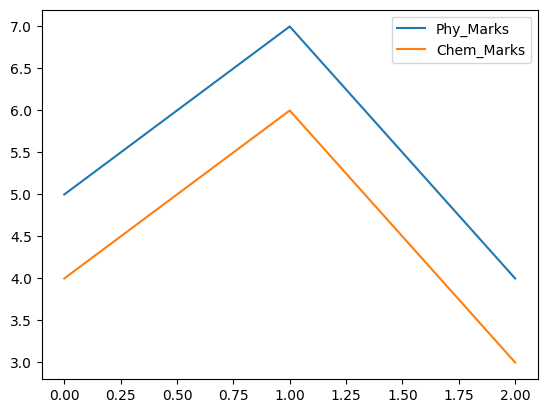

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/data.csv')

df.plot()

plt.show()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic = titanic.drop(columns=['sex', 'embarked', 'deck', 'class', 'who', 'embark_town', 'alive','alone','adult_male'])
titanic.shape
#titanic.corr()  #output will be between -1 to +1, where +1 means directly proportional and vice versa.
titanic

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000
